In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import csv
import quandl
from config import api_key_housing

states = ["Alabama", "Alaska", "Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia",
          "Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts",
          "Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey",
          "New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island",
          "South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin",
          "Wyoming"
]

In [2]:
df = pd.DataFrame(data={"States": states})
df["Median Income"] = ""
df["Home Value '11"] = ""
df["Home Value '17"] = ""
df["Bachelors Degree"] = ""
df["Population"] = ""
df["Divorce"] = ""


df

,States,Median Income,Home Value '11,Home Value '17,Bachelors Degree,Population,Divorce
0,Alabama,,,,,,
1,Alaska,,,,,,
2,Arizona,,,,,,
3,Arkansas,,,,,,
4,California,,,,,,
5,Colorado,,,,,,
6,Connecticut,,,,,,
7,Delaware,,,,,,
8,District of Columbia,,,,,,
9,Florida,,,,,,


In [4]:
area_categorytest = "S"
area_codetest = "2"
indicator_codetest = "MVALFAH"
frequencytest = "annual"
numberofrowstest = "11"
# Zillow - Median Value Per Square Foot - All Homes|MVALFA

test_url = f"https://www.quandl.com/api/v3/datasets/ZILLOW/{area_categorytest}{area_codetest}_{indicator_codetest}?&collapse={frequencytest}&rows={numberofrowstest}"

responsetest = requests.get(test_url).json()

# pprint(responsetest)

# home11 = responsetest['dataset']['data'][8][1]
# print(home11)

In [5]:
statesdf = pd.read_csv("StateList.csv")
merge_table = pd.merge(df, statesdf, on="States", how="right")
organized_df = merge_table[["States","Area Code", "Home Value '11", "Home Value '17"]]

organized_df

,States,Area Code,Home Value '11,Home Value '17
0,Alabama,3,,
1,Alaska,2,,
2,Arizona,5,,
3,Arkansas,4,,
4,California,6,,
5,Colorado,7,,
6,Connecticut,8,,
7,Delaware,10,,
8,District of Columbia,9,,
9,Florida,11,,


In [6]:


for index, row in organized_df.iterrows():
    area_code = row["Area Code"]
    area_category = "S"
    indicator_code = "MVALFAH"
    frequency = "annual"
    numberofrows = "11"
    base_url = f"https://www.quandl.com/api/v3/datasets/ZILLOW/{area_category}{area_code}_{indicator_code}?&collapse={frequency}&rows={numberofrows}&api_key={api_key_housing}"
    response1 = requests.get(base_url)
    response1json = response1.json()
    organized_df.loc[index, "Home Value '11"] = response1json['dataset']['data'][8][1]
    organized_df.loc[index, "Home Value '17"] = response1json['dataset']['data'][2][1]


organized_df
# print(response1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,States,Area Code,Home Value '11,Home Value '17
0,Alabama,3,56,69
1,Alaska,2,170,186
2,Arizona,5,79,138
3,Arkansas,4,60,74
4,California,6,196,339
5,Colorado,7,134,226
6,Connecticut,8,144,151
7,Delaware,10,110,137
8,District of Columbia,9,332,490
9,Florida,11,77,134


In [43]:
organized_df[["Home Value '11", "Home Value '17"]] = organized_df[["Home Value '11", "Home Value '17"]].apply(pd.to_numeric)

organized_df["Home Value % Change"] = round(((organized_df["Home Value '17"] - organized_df["Home Value '11"]) / organized_df["Home Value '11"])*100,2)
sorted_df = organized_df.sort_values("Home Value % Change", ascending=False)


sorted_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,States,Area Code,Home Value '11,Home Value '17,Home Value % Change
28,Nevada,34,73,149,104.11
2,Arizona,5,79,138,74.68
9,Florida,11,77,134,74.03
4,California,6,196,339,72.96
22,Michigan,23,64,109,70.31
5,Colorado,7,134,226,68.66
47,Washington,47,135,221,63.70
37,Oregon,38,120,196,63.33
12,Idaho,15,86,134,55.81
8,District of Columbia,9,332,490,47.59


<function matplotlib.pyplot.show(*args, **kw)>

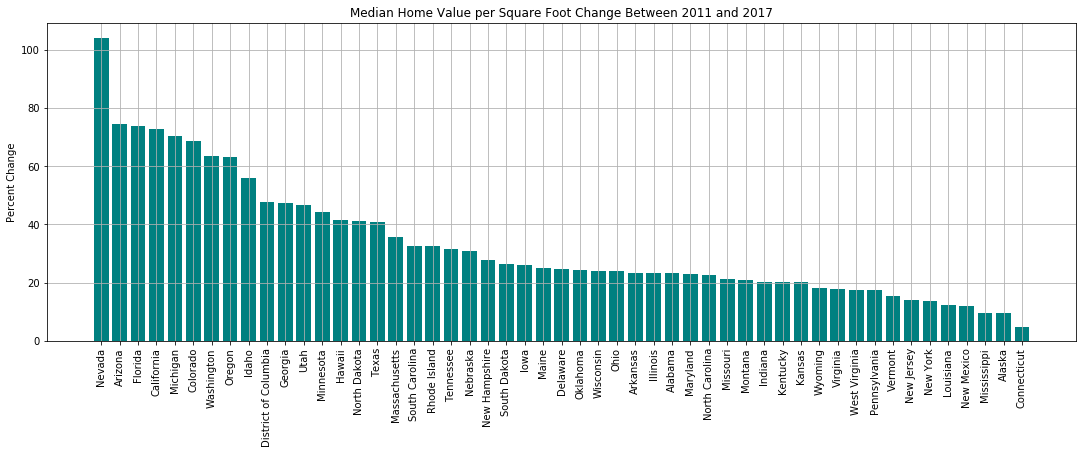

In [47]:
home11 = sorted_df["Home Value '11"]
home17 = sorted_df["Home Value '17"]
homepct = sorted_df["Home Value % Change"]
states = sorted_df["States"]

fig,ax=plt.subplots(figsize=(15,5))
plt.bar(states, homepct, color='teal', alpha=1, align="center")
plt.tight_layout()
plt.xticks(states, rotation='90')
plt.title("Median Home Value per Square Foot Change Between 2011 and 2017")
plt.ylabel("Percent Change")
plt.grid()
plt.show